# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

df = pd.read_csv('data/human_body_temperature.csv')

Question 1.  Is the distribution normal?  First, let's take a look at it.

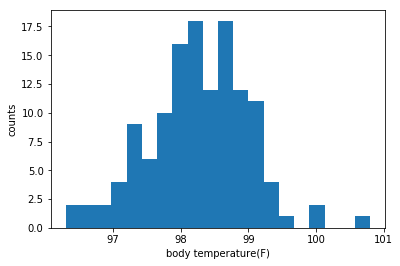

In [2]:
#df.head()
#df.info
plt.hist(df['temperature'], bins=20)
plt.xlabel('body temperature(F)')
plt.ylabel('counts')
plt.show()




The distribution is not symmetric, with more stats in the low tail than in the high tail.  
It does not quite seem to be a normal distribution, although it's close.  But to be sure, I'll simulate a normal distribution and compare the CDF to the data CDF.



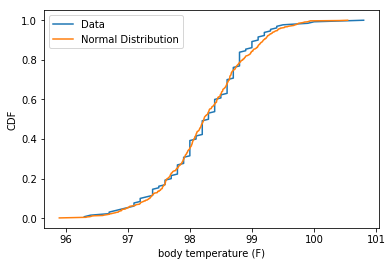

In [4]:
#First, use ecdf function from DataCamp exercises to calculate the ecdf
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Now do simulation, calculate ecdfs and plot
sim=np.random.normal(df['temperature'].mean(), df['temperature'].std(), 5*len(df['temperature']))
xdata, ydata = ecdf(df['temperature'])
xsim, ysim = ecdf(sim)
plt.plot(xdata, ydata)
plt.plot(xsim, ysim)
plt.xlabel('body temperature (F)')
plt.ylabel('CDF')
plt.legend(['Data', 'Normal Distribution'])
plt.show()

#The data CDF does differ a little from the simulated normal distribution, but it's not bad.  
#I would say it's an undersampled normal distribution.

In [44]:
#2.  Is the sample size large? Are the observations independent? 
len(df['temperature'])
# There are 130 samples, which is large enough that the CLT should apply.  
# They are taken from individuals, and so should not be correlated (ie. they are independent.)
#
    

(-5.4548232923645195, 4.9021570141012155e-08)


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Question 3.  Is the true population mean really 98.6 degrees F?
    Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the tt or zz statistic?
    Now try using the other test. How is the result be different? Why? 
    
Begin Answer: We need to test whether the given distribution is consistent with the 'true mean'.  
    We have one sample, with plenty of stats, so let's use the ztest and we're testing whether it's consistent with 1 mean, so the t statistic is most appropriate

In [5]:
#
from statsmodels.stats import weightstats as stests
print(stests.ztest(df['temperature'], x2=None, value=98.6, alternative='two-sided'))



(-5.4548232923645195, 4.9021570141012155e-08)


Looks like the ztest reports that the true mean isn't 98.6

Continuation of #3:  now try the other test, the 1-sample t-test.  Should be consistent with z-test.  And it is.



In [6]:
from scipy import stats
stats.ttest_1samp(df['temperature'], 98.6)



Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Question 4.  Draw a small sample of size 10 from the data and repeat both tests.

We're low on statistics now, so the t statistic is the correct one to use.



In [7]:

#define new sample of 10  random samples from the data
small_temp=np.random.choice(df['temperature'],10)
print('Z test result:'  , stests.ztest(small_temp, value=98.6))
print(stats.ttest_1samp(small_temp, 98.6))



Z test result: (-1.912980056854894, 0.055750605603922622)
Ttest_1sampResult(statistic=-1.912980056854894, pvalue=0.088040648544068262)


Significantly higher p-values for both tests, since it's harder to exclude a value from a small data set
As I re-run it several times, scores and p-values can vary wildly (depending on the sample of 10 I get)
At the small p end, the ttest result is always bigger than the z-test result, making it much harder to conclude that the data set is inconsistent with the mean using the ttest.  It's more applicable at small N.


